In [1]:
from google.colab import files


uploaded = files.upload()

Saving E-Commerce.csv to E-Commerce.csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('E-Commerce.csv')
#Q 1. To get familiar with the data
#a) Print out the first 10 and the last 10 records of the data. (2 marks)

# Print the first 10 records
print("First 10 records:")
print(df.head(10))

# Print the last 10 records
print("\nLast 10 records:")
print(df.tail(10))



First 10 records:
                   Customer_uniq_id Region  Order_Date Expected_Delivery_Date  \
0  e71017e224688489edfe856f2308806d  East   24-10-2021             25-10-2021   
1  6286847ee2da18f587503db49511c539  East   24-10-2021             25-10-2021   
2  0686fec9b70e5039583a38119ca0c835   West  24-10-2021             25-10-2021   
3  ea2406dc597bee2abb6b867fa668501f   West  24-10-2021             25-10-2021   
4  5935ed077915347dc695744df68c565c  East   03-09-2021             04-09-2021   
5  89fcdddaad50084e395d0928a7426afe  East   03-09-2021             04-09-2021   
6  b9b183aa18d3a721d2ac23e7184525b0  East   03-09-2021             04-09-2021   
7  dee64864c0419bec80fbbb94d19bc40d  East   03-09-2021             04-09-2021   
8  595f55f2c1293f07ea9ec9fa2bb39f46  East   03-09-2021             04-09-2021   
9  547b6585272473ae006bcfbdb47b6ae0   West  26-08-2021             27-08-2021   

  Delivered_Date                                       product_name  \
0     25-10-2021  I

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('E-Commerce.csv')
num_rows, num_columns = df.shape

#Method 1

# Print the number of rows and columns
print("Method 1:")
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#Method2
num_rows = len(df)
num_columns = len(df.columns)

# Print the number of rows and columns
print("Method 2:")
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Method 1:
Number of rows: 8906
Number of columns: 17
Method 2:
Number of rows: 8906
Number of columns: 17


In [ ]:
#c)How many object datatypes are there ?
# Filter for columns with object data types
object_columns = df.select_dtypes(include=['object'])

# Count the number of columns with object data types
num_object_columns = object_columns.shape[1]

# Print the number of object data type columns
print("Number of object data type columns:", num_object_columns)

#d)Is there any boolean datatype?

# Filter for columns with boolean data types
boolean_columns = df.select_dtypes(include=['bool'])

# Count the number of columns with boolean data types
num_boolean_columns = boolean_columns.shape[1]

# Print the number of boolean data type columns
print("Number of boolean data type columns:", num_boolean_columns)

Number of object data type columns: 14
Number of boolean data type columns: 0


In [ ]:
#2)ELIMINATING NON INFORMATIVE COLUMNS
#a)Drop the columns product_specifications and descripton
columns_to_drop = ['product_specifications', 'description']

# Use the .drop() method to drop the specified columns
df = df.drop(columns=columns_to_drop)

#b)To permanently delete columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#3)Here we summarize the data at brand level
#a)How many unique brands are there ?
unique_brands = df['Brand'].nunique()

# Print the number of unique brands
print("Number of unique brands:", unique_brands)

Number of unique brands: 2484


In [ ]:
#b)Show the average product_rating within each brand.
# Group the data by 'Brand' and calculate the mean of 'product_rating' within each group
brand_avg_rating = df.groupby('Brand')['product_rating'].mean().reset_index()

# Print the average product rating within each brand
print(brand_avg_rating)

            Brand  product_rating
0            1OAK        1.500000
1     3A AUTOCARE        3.268293
2          3D MAT        3.000000
3       3KFACTORY        2.000000
4              4D        3.600000
...           ...             ...
2479       ZORDEN        4.000000
2480       ZOSIGN        3.400000
2481      ZRESTHA        1.000000
2482        ZYXEL        3.333333
2483       TARKAN        5.000000

[2484 rows x 2 columns]


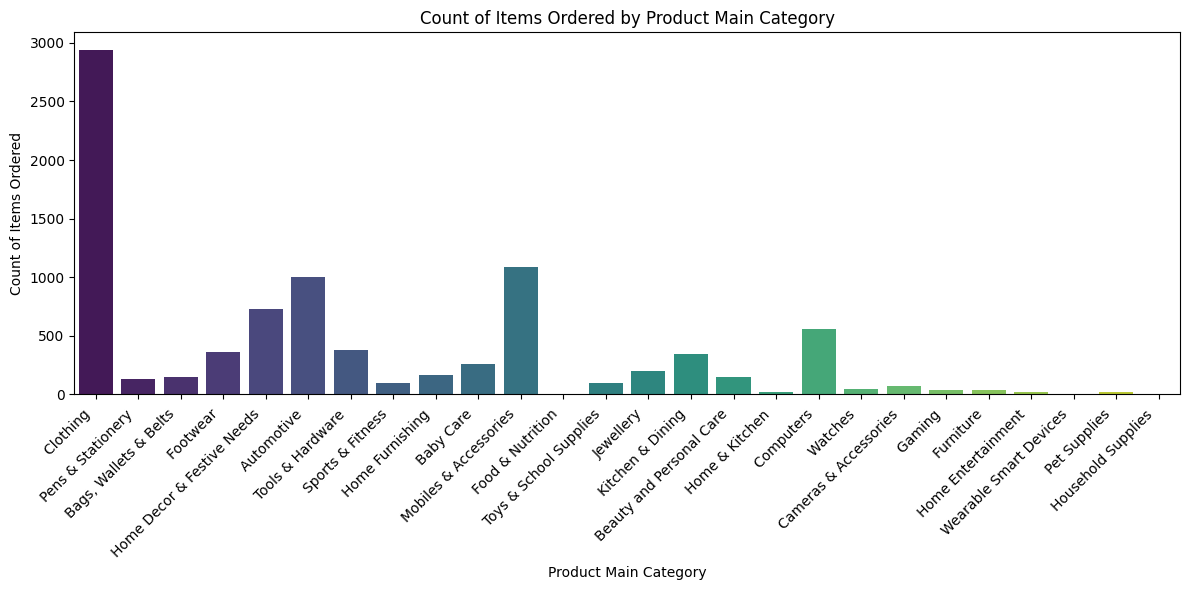

In [4]:
#4)Next we study the main categories of the product
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('E-Commerce.csv')
num_rows, num_columns = df.shape
# Use Seaborn to create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='product_main_category', data=df, palette='viridis')  # Create the count plot
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Product Main Category')  # Set x-axis label
plt.ylabel('Count of Items Ordered')  # Set y-axis label
plt.title('Count of Items Ordered by Product Main Category')  # Set the plot title

# Show the plot
plt.tight_layout()  # Ensures that labels are not cut off
plt.show()

In [5]:
#b) From the plot identify for which two product_main_category(s) maximum and minimum orders were placed.
# Find the product_main_category with maximum and minimum orders
max_category = df['product_main_category'].value_counts().idxmax()
min_category = df['product_main_category'].value_counts().idxmin()

print(f"The product_main_category with maximum orders is: {max_category}")
print(f"The product_main_category with minimum orders is: {min_category}")

The product_main_category with maximum orders is: Clothing 
The product_main_category with minimum orders is: Wearable Smart Devices 


In [6]:
# c) Write code to print out the top 5 product_main_category(s) in descending order?
# Calculate the count of orders for each product_main_category and sort in descending order
top_categories = df['product_main_category'].value_counts().sort_values(ascending=False)

# Print the top 5 categories
print("Top 5 Product Main Categories (Descending Order):")
print(top_categories.head(5))

Top 5 Product Main Categories (Descending Order):
Clothing                       2943
Mobiles & Accessories          1084
Automotive                     1001
Home Decor & Festive Needs      727
Computers                       558
Name: product_main_category, dtype: int64


In [11]:
# Q 5. Find the total Revenue generated by the E-Commerce company over all orders placed.
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('E-Commerce.csv')
num_rows, num_columns = df.shape

total_revenue = df['discounted_price'].sum()

# Print the total revenue
print(f'Total Revenue Generated: ${total_revenue:.2f}')



Total Revenue Generated: $9740479.00


In [10]:
#Q6.Calculate the total BrandRevenue and list the top 10 Brand having maximum revenue in descending order .
# Calculate the BrandRevenue (Q6)
df['BrandRevenue'] = df['discounted_price'] - df['revenue']

# Calculate the total BrandRevenue and list the top 10 brands with the maximum revenue in descending order
brand_revenue_data = df.groupby('Brand')['BrandRevenue'].sum().reset_index()
top_10_brands = brand_revenue_data.nlargest(10, 'BrandRevenue')
print("\nTop 10 Brands with Maximum Brand Revenue:")
print(top_10_brands)



Top 10 Brands with Maximum Brand Revenue:
             Brand  BrandRevenue
512   DAILYOBJECTS        197424
578       DIVINITI        190820
188         AUDEZE        116292
2038     SPRINGWEL         90354
179           ASUS         68420
1188    LAL HAVELI         66278
2137     TATVAARTS         65601
780           GAGA         61131
290    BLACKBERRYS         51676
1470       NETGEAR         47262


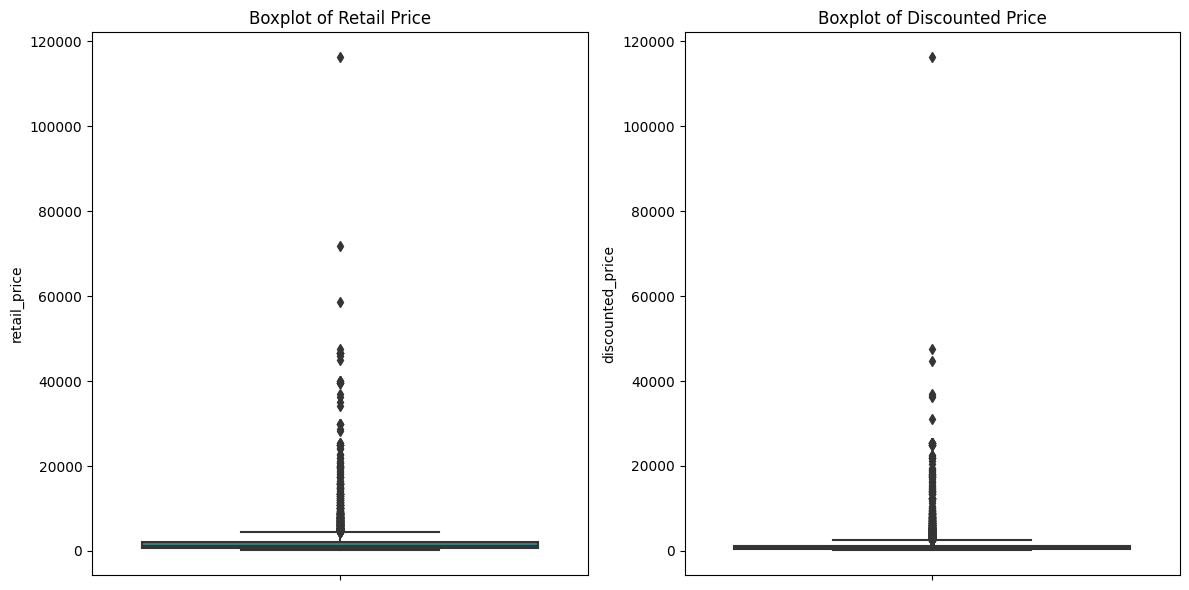

In [5]:
#Q 7. Compare prices of the products.
#a) Draw boxplots of retail_price & discounted_price.

# Create a figure with two subplots (one for each boxplot)
plt.figure(figsize=(12, 6))

# Create the boxplot for 'retail_price'
plt.subplot(1, 2, 1)
sns.boxplot(y='retail_price', data=df, palette='viridis')
plt.title('Boxplot of Retail Price')

# Create the boxplot for 'discounted_price'
plt.subplot(1, 2, 2)
sns.boxplot(y='discounted_price', data=df, palette='viridis')
plt.title('Boxplot of Discounted Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

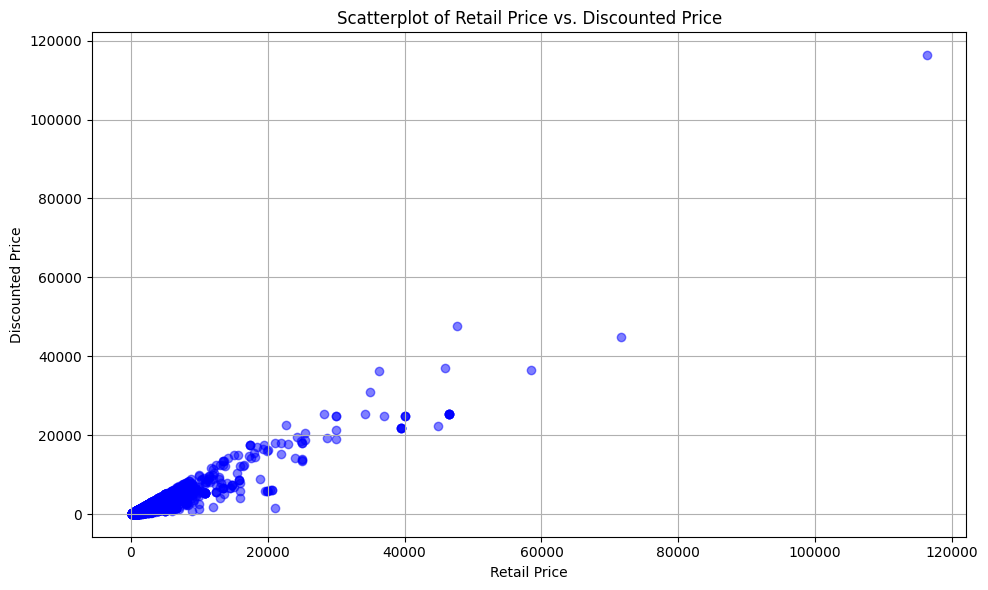

In [6]:
#b) Are there any outliers? (Yes/No)
#yes

#c) Create a scatterplot of retail_price (x-axis) and discounted_price (y-axis)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(df['retail_price'], df['discounted_price'], alpha=0.5, color='b')  # Create the scatterplot
plt.xlabel('Retail Price')  # Set x-axis label
plt.ylabel('Discounted Price')  # Set y-axis label
plt.title('Scatterplot of Retail Price vs. Discounted Price')  # Set the plot title

# Show the plot
plt.grid(True)  # Add a grid for better visualization
plt.tight_layout()
plt.show()


In [10]:
# Group the data by 'brand' and calculate the total number of orders per brand
brand_orders = df.groupby('Brand')['product_unique ID'].count().reset_index()

# Rename the columns for clarity
brand_orders.columns = ['Brand', 'Total Orders']

# Print the new DataFrame
print(brand_orders)

            Brand  Total Orders
0            1OAK             2
1     3A AUTOCARE            41
2          3D MAT             1
3       3KFACTORY             1
4              4D             5
...           ...           ...
2479       ZORDEN             1
2480       ZOSIGN             5
2481      ZRESTHA             1
2482        ZYXEL             9
2483       TARKAN             1

[2484 rows x 2 columns]


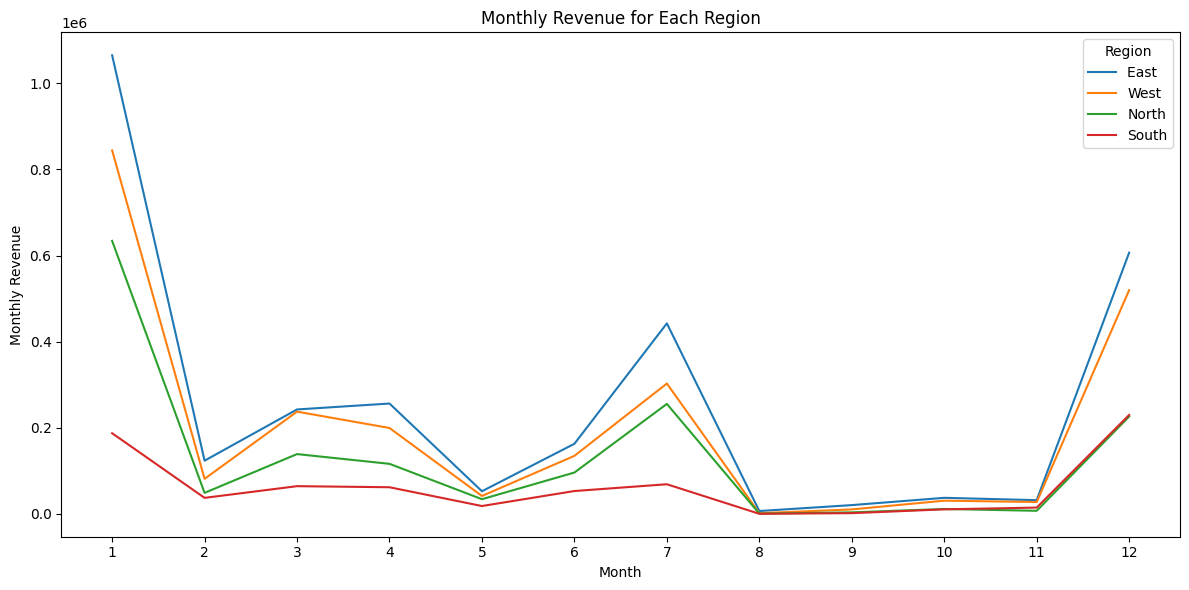

In [15]:
#Q 9.Compare performance regionwise
#a) Draw a lineplot for the monthly Revenue of E-Commerce Company for each region separately.
# Convert the 'order_date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract the month from the 'order_date' column and create a new column 'order_month'
df['order_month'] = df['Order_Date'].dt.month

# Group the data by 'region' and 'order_month' and calculate the total revenue
monthly_revenue = df.groupby(['Region', 'order_month'])['revenue'].sum().reset_index()

# Create a line plot for each region separately
regions = df['Region'].unique()

plt.figure(figsize=(12, 6))  # Set the figure size

for Region in regions:
    region_data = monthly_revenue[monthly_revenue['Region'] == Region]
    plt.plot(region_data['order_month'], region_data['revenue'], label=Region)

plt.xlabel('Month')  # Set x-axis label
plt.ylabel('Monthly Revenue')  # Set y-axis label
plt.title('Monthly Revenue for Each Region')  # Set the plot title
plt.legend(title='Region', loc='upper right')  # Add a legend

# Show the plot
plt.xticks(range(1, 13))  # Set x-axis ticks for months (1 to 12)
plt.tight_layout()
plt.show()

<ipython-input-7-70a9d217182d>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


Best Performing Months by Region:
   Region  order_month  revenue
0   East             1   838586
17  North            1   537426
37  South           12   222818
50   West            1   706210

Worst Performing Months by Region:
   Region  order_month  revenue
2   East             4     3777
29  North            8      751
45  South            8      314
62   West            8     1750


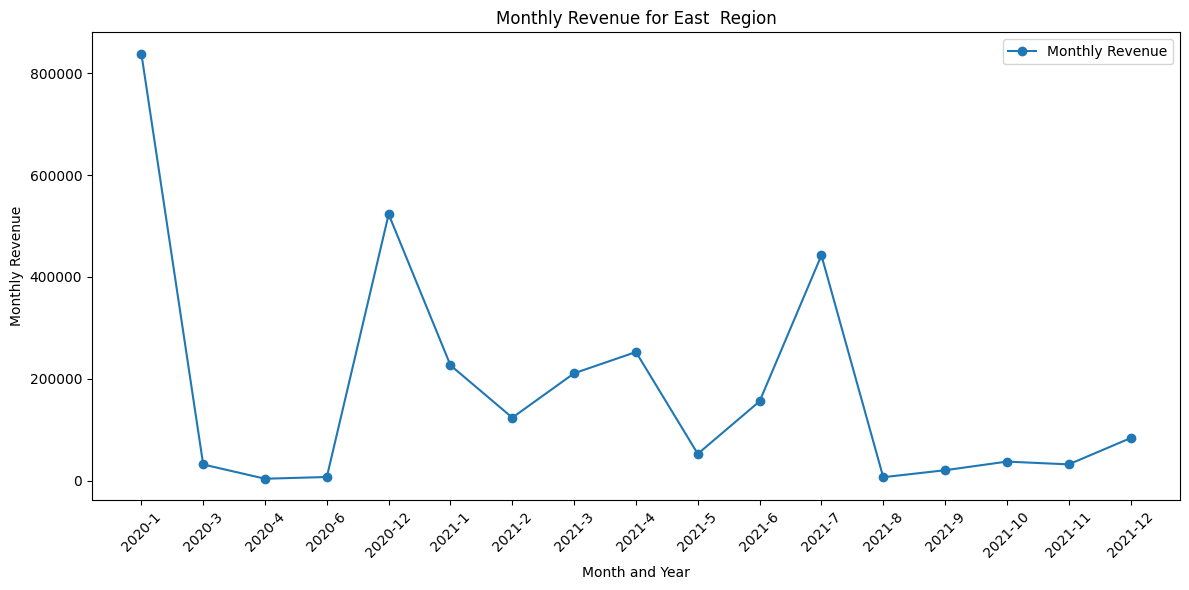

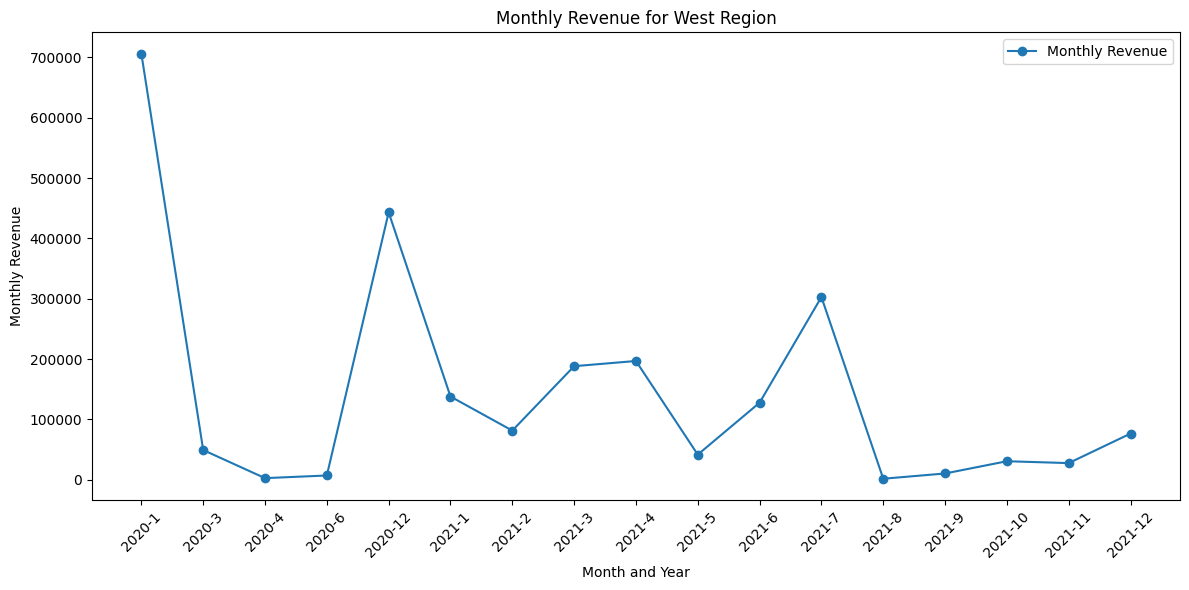

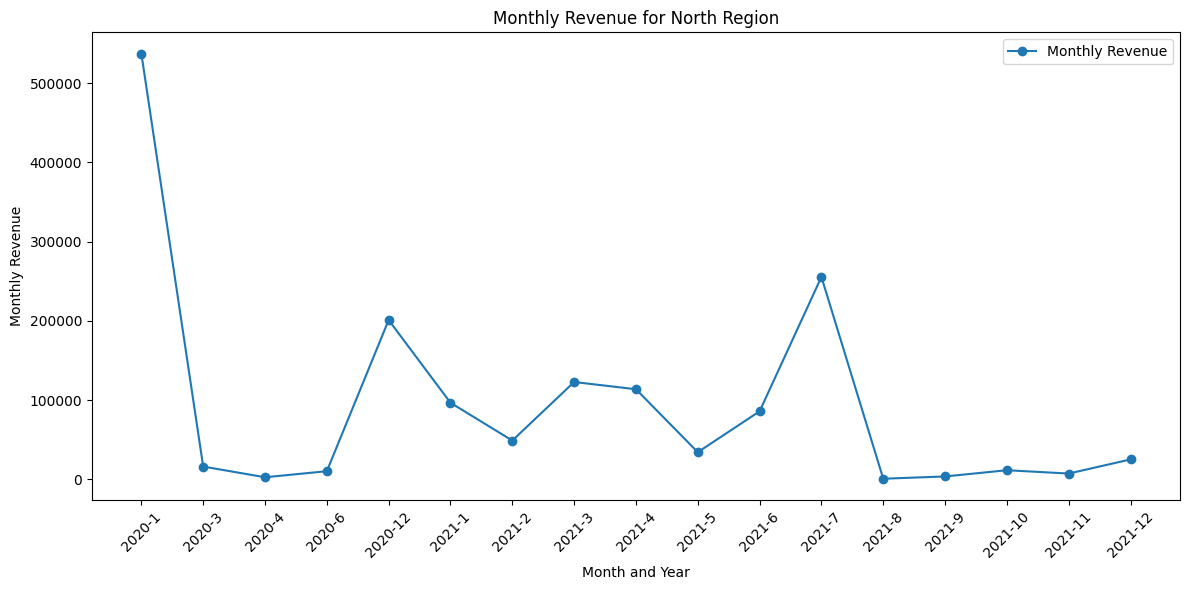

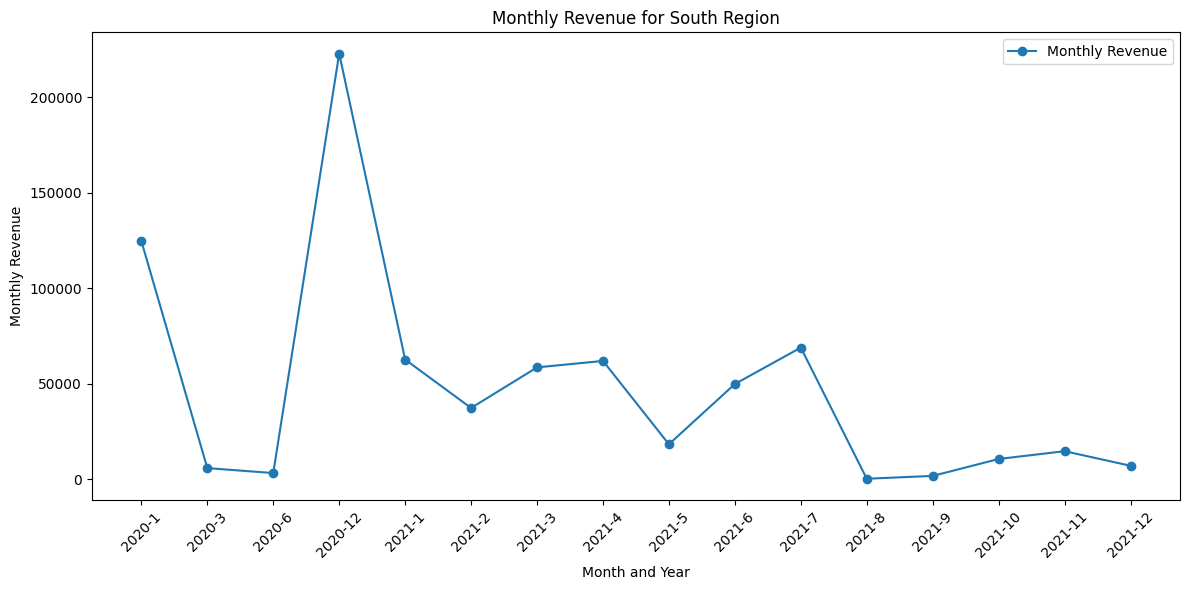

In [7]:
#b) Identify the best and the worst performing months for each region.
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('E-Commerce.csv')
# Convert the 'order_date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract the month from the 'order_date' column and create a new column 'order_month'
df['order_month'] = df['Order_Date'].dt.month
df['order_year'] = df['Order_Date'].dt.year
# Calculate the revenue for each order
df['revenue'] = (df['retail_price'] - df['discounted_price'])

# Group the data by 'region' and 'order_month' and calculate the total revenue
# Group the data by 'Region', 'order_year', and 'order_month' and calculate the total revenue
monthly_revenue = df.groupby(['Region', 'order_year', 'order_month'])['revenue'].sum().reset_index()


# Find the best and worst performing months for each region
best_months = monthly_revenue.groupby('Region')['revenue'].idxmax()
worst_months = monthly_revenue.groupby('Region')['revenue'].idxmin()

# Get the corresponding months and revenues for the best and worst months
best_months_data = monthly_revenue.loc[best_months, ['Region', 'order_month', 'revenue']]
worst_months_data = monthly_revenue.loc[worst_months, ['Region', 'order_month', 'revenue']]

# Print the results
print("Best Performing Months by Region:")
print(best_months_data)

print("\nWorst Performing Months by Region:")
print(worst_months_data)
#output : Best performing month for East was January and its worst performing month was August
#Best performing month for North was January and its worst performing month was August
#Best performing month for South was December and its worst performing month was August
#Best performing month for West was January and its worst performing month was August
# Create line plots for the best and worst performing months by region
regions = df['Region'].unique()



for Region in regions:
    region_data = monthly_revenue[monthly_revenue['Region'] == Region]

    plt.figure(figsize=(12, 6))
    plt.plot(region_data['order_year'].astype(str) + '-' + region_data['order_month'].astype(str), region_data['revenue'], marker='o', label='Monthly Revenue')
    plt.xlabel('Month and Year')
    plt.ylabel('Monthly Revenue')
    plt.title(f'Monthly Revenue for {Region} Region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()




